In [1]:
import pandas as pd
import numpy as np
import scikitplot as skplt
import itertools
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
train = pd.read_csv("UNSW_NB15_training-set.csv")
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [3]:
test = pd.read_csv("UNSW_NB15_testing-set.csv")
test.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [6]:
#delete proto
train = train.drop('proto', axis=1)
test = test.drop('proto', axis=1)
#service and state as numbers
train.state = train.state.map({'FIN':0 , 'INT':1, 'CON':2, 'REQ':3, 'ACC':4, 'RST':5, 'CLO':6})
train.service = train.service.map({'-':0 , 'dns':1, 'http':2, 'smtp':3, 'ftp':4, 'ftp-data':5, 'pop3':6, 'ssh':7, 'ssl':8, 'snmp':9, 'dhcp':10, 'radius':11, 'irc':12})
test.state = test.state.map({'FIN':0 , 'INT':1, 'CON':2, 'REQ':3, 'ACC':4, 'RST':5, 'CLO':6})
test.service = test.service.map({'-':0 , 'dns':1, 'http':2, 'smtp':3, 'ftp':4, 'ftp-data':5, 'pop3':6, 'ssh':7, 'ssl':8, 'snmp':9, 'dhcp':10, 'radius':11, 'irc':12})
train.attack_cat = train.attack_cat.map({'Normal': 0, 'Generic': 1, 'Exploits':2, 'Fuzzers':3, 'DoS':4, 'Reconnaissance':5, 'Analysis':6, 'Backdoor':7, 'Shellcode':8, 'Worms':9 })
test.attack_cat = test.attack_cat.map({'Normal': 0, 'Generic': 1, 'Exploits':2, 'Fuzzers':3, 'DoS':4, 'Reconnaissance':5, 'Analysis':6, 'Backdoor':7, 'Shellcode':8, 'Worms':9 })

In [7]:
train = train[np.isfinite(train).all(1)]
test = test[np.isfinite(test).all(1)]

In [8]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
id,id,0.0
synack,synack,0.0
ackdat,ackdat,0.0
smean,smean,0.0
dmean,dmean,0.0
trans_depth,trans_depth,0.0
response_body_len,response_body_len,0.0
ct_srv_src,ct_srv_src,0.0
ct_state_ttl,ct_state_ttl,0.0
tcprtt,tcprtt,0.0


In [9]:
percent_missing = test.isnull().sum() * 100 / len(test)
missing_value_df = pd.DataFrame({'column_name': test.columns, 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
id,id,0.0
synack,synack,0.0
ackdat,ackdat,0.0
smean,smean,0.0
dmean,dmean,0.0
trans_depth,trans_depth,0.0
response_body_len,response_body_len,0.0
ct_srv_src,ct_srv_src,0.0
ct_state_ttl,ct_state_ttl,0.0
tcprtt,tcprtt,0.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82332 entries, 0 to 82331
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   service            82332 non-null  int64  
 3   state              82332 non-null  int64  
 4   spkts              82332 non-null  int64  
 5   dpkts              82332 non-null  int64  
 6   sbytes             82332 non-null  int64  
 7   dbytes             82332 non-null  int64  
 8   rate               82332 non-null  float64
 9   sttl               82332 non-null  int64  
 10  dttl               82332 non-null  int64  
 11  sload              82332 non-null  float64
 12  dload              82332 non-null  float64
 13  sloss              82332 non-null  int64  
 14  dloss              82332 non-null  int64  
 15  sinpkt             82332 non-null  float64
 16  dinpkt             823

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175326 entries, 0 to 175340
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175326 non-null  int64  
 1   dur                175326 non-null  float64
 2   service            175326 non-null  int64  
 3   state              175326 non-null  float64
 4   spkts              175326 non-null  int64  
 5   dpkts              175326 non-null  int64  
 6   sbytes             175326 non-null  int64  
 7   dbytes             175326 non-null  int64  
 8   rate               175326 non-null  float64
 9   sttl               175326 non-null  int64  
 10  dttl               175326 non-null  int64  
 11  sload              175326 non-null  float64
 12  dload              175326 non-null  float64
 13  sloss              175326 non-null  int64  
 14  dloss              175326 non-null  int64  
 15  sinpkt             175326 non-null  float64
 16  di

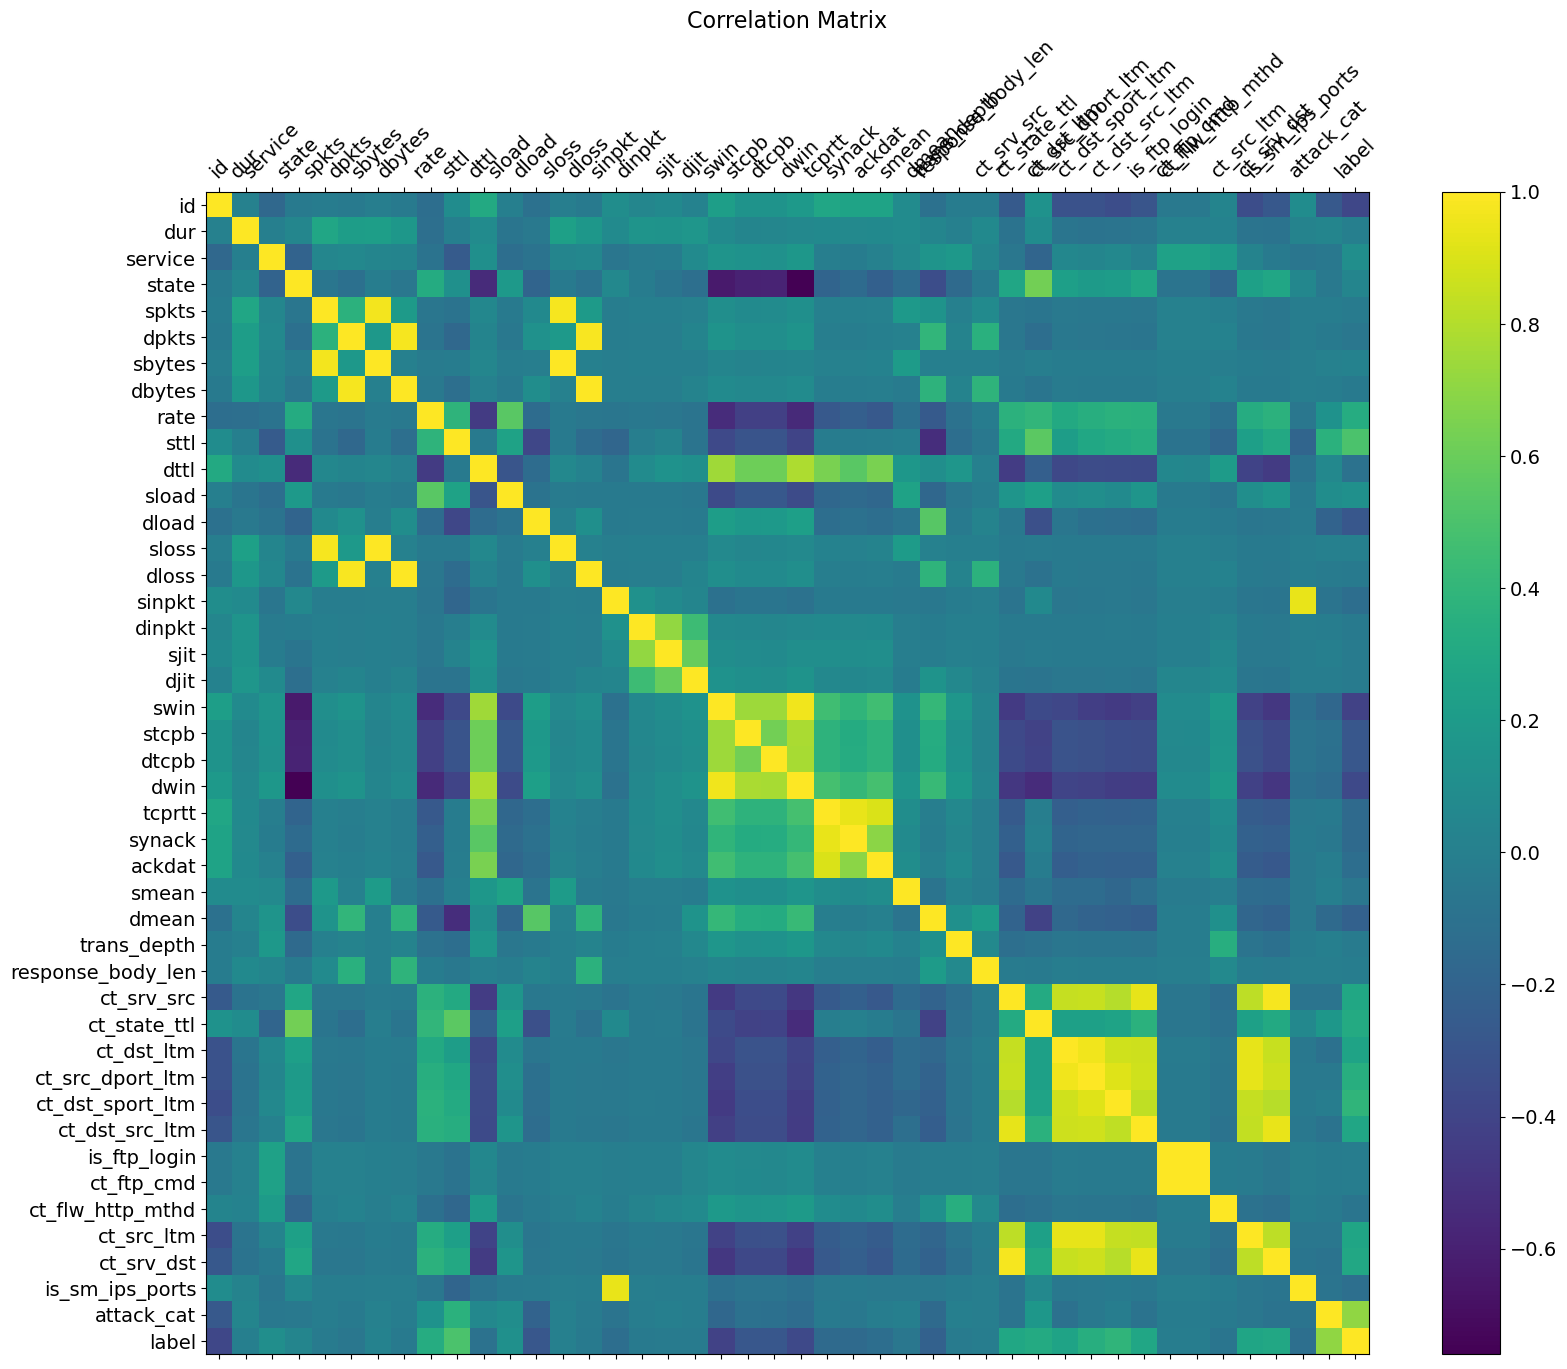

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

variables to modify: 2=service, 6=sbytes, 8=rate, 9=sttl, 11=sload, 31=ct_state_ttl, 33=ct_src_dport_itm, 34=ct_dst_sport_ltm, 39=ct_src_ltm, 40=ct_srv_dst 

In [13]:
#new train and test with better distribution and separating y
from sklearn.model_selection import train_test_split
full_df = pd.concat([train, test])
y = full_df['label']
X = full_df.drop(columns=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
y_multi_train = X_train['attack_cat']
y_multi_test = X_test['attack_cat']
X_train = X_train.drop(columns=['attack_cat'])
X_test = X_test.drop(columns=['attack_cat'])
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_multi_train.shape, y_multi_test.shape)

(172630, 42) (85028, 42) (172630,) (85028,) (172630,) (85028,)


In [14]:
X_train.describe()

,id,dur,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,172630.000000,172630.000000,172630.000000,172630.000000,172630.000000,172630.000000,1.726300e+05,1.726300e+05,1.726300e+05,172630.000000,...,172630.000000,172630.000000,172630.000000,172630.000000,172630.000000,172630.000000,172630.000000,172630.000000,172630.000000,172630.000000
mean,72702.044135,1.246084,0.828558,0.656103,19.289098,18.320008,7.976568e+03,1.420564e+04,9.124200e+04,180.026490,...,6.046718,5.238238,4.035104,8.327620,0.013051,0.013080,0.131107,6.797793,9.121427,0.014360
std,48924.185754,5.982475,1.306070,0.692649,125.621549,110.118562,1.595469e+05,1.438928e+05,1.600462e+05,102.484566,...,8.158225,8.151126,5.831771,11.122677,0.117900,0.118215,0.667976,8.382731,10.876174,0.118971
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,32106.250000,0.000008,0.000000,0.000000,2.000000,0.000000,1.140000e+02,0.000000e+00,3.079955e+01,62.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,64289.500000,0.004157,0.000000,1.000000,4.000000,2.000000,5.220000e+02,1.780000e+02,2.959929e+03,254.000000,...,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000
75%,110678.750000,0.685935,1.000000,1.000000,12.000000,10.000000,1.344000e+03,1.056000e+03,1.250000e+05,254.000000,...,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000
max,175340.000000,59.999989,12.000000,6.000000,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,...,59.000000,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000


In [15]:
X_test.describe()

,id,dur,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,85028.000000,85028.000000,85028.000000,85028.000000,85028.000000,85028.000000,8.502800e+04,8.502800e+04,8.502800e+04,85028.000000,...,85028.000000,85028.000000,85028.000000,85028.000000,85028.000000,85028.000000,85028.00000,85028.000000,85028.000000,85028.000000
mean,73044.288811,1.248217,0.828210,0.651362,20.771158,18.913252,9.785258e+03,1.475862e+04,9.126080e+04,179.962918,...,6.058945,5.239062,4.028285,8.314779,0.012349,0.012384,0.13385,6.805593,9.121689,0.014101
std,48939.817442,5.958224,1.301501,0.689843,154.813052,115.693552,1.995713e+05,1.507861e+05,1.609260e+05,102.495050,...,8.205676,8.181054,5.831403,11.117480,0.112338,0.112700,0.70925,8.424142,10.872368,0.117909
min,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000
25%,32414.000000,0.000008,0.000000,0.000000,2.000000,0.000000,1.140000e+02,0.000000e+00,3.076993e+01,62.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,2.000000,2.000000,0.000000
50%,64694.000000,0.004474,0.000000,1.000000,4.000000,2.000000,5.280000e+02,1.780000e+02,2.946955e+03,254.000000,...,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.00000,3.000000,4.000000,0.000000
75%,111418.250000,0.685551,1.000000,1.000000,12.000000,10.000000,1.400000e+03,1.076000e+03,1.250000e+05,254.000000,...,6.000000,4.000000,3.000000,8.000000,0.000000,0.000000,0.00000,8.000000,11.000000,0.000000
max,175341.000000,59.999989,12.000000,5.000000,9616.000000,10872.000000,1.296523e+07,1.459086e+07,1.000000e+06,255.000000,...,59.000000,59.000000,46.000000,63.000000,4.000000,4.000000,30.00000,60.000000,62.000000,1.000000


In [16]:
yt=y_test.tolist()
ymt=y_multi_test.tolist()
def countOccurrence(a):
    k = {}
    for j in a:
        if j in k:
            k[j] +=1
        else:
            k[j] =1
    return k
print(countOccurrence(yt))
print(countOccurrence(ymt))

{1: 54256, 0: 30772}
{3: 7921, 2: 14709, 0: 30772, 5: 4578, 1: 19423, 4: 5357, 7: 780, 8: 513, 9: 66, 6: 909}


In [17]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
y_multi_train.to_csv('y_multi_train.csv', index=False)
y_multi_test.to_csv('y_multi_test.csv', index=False)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

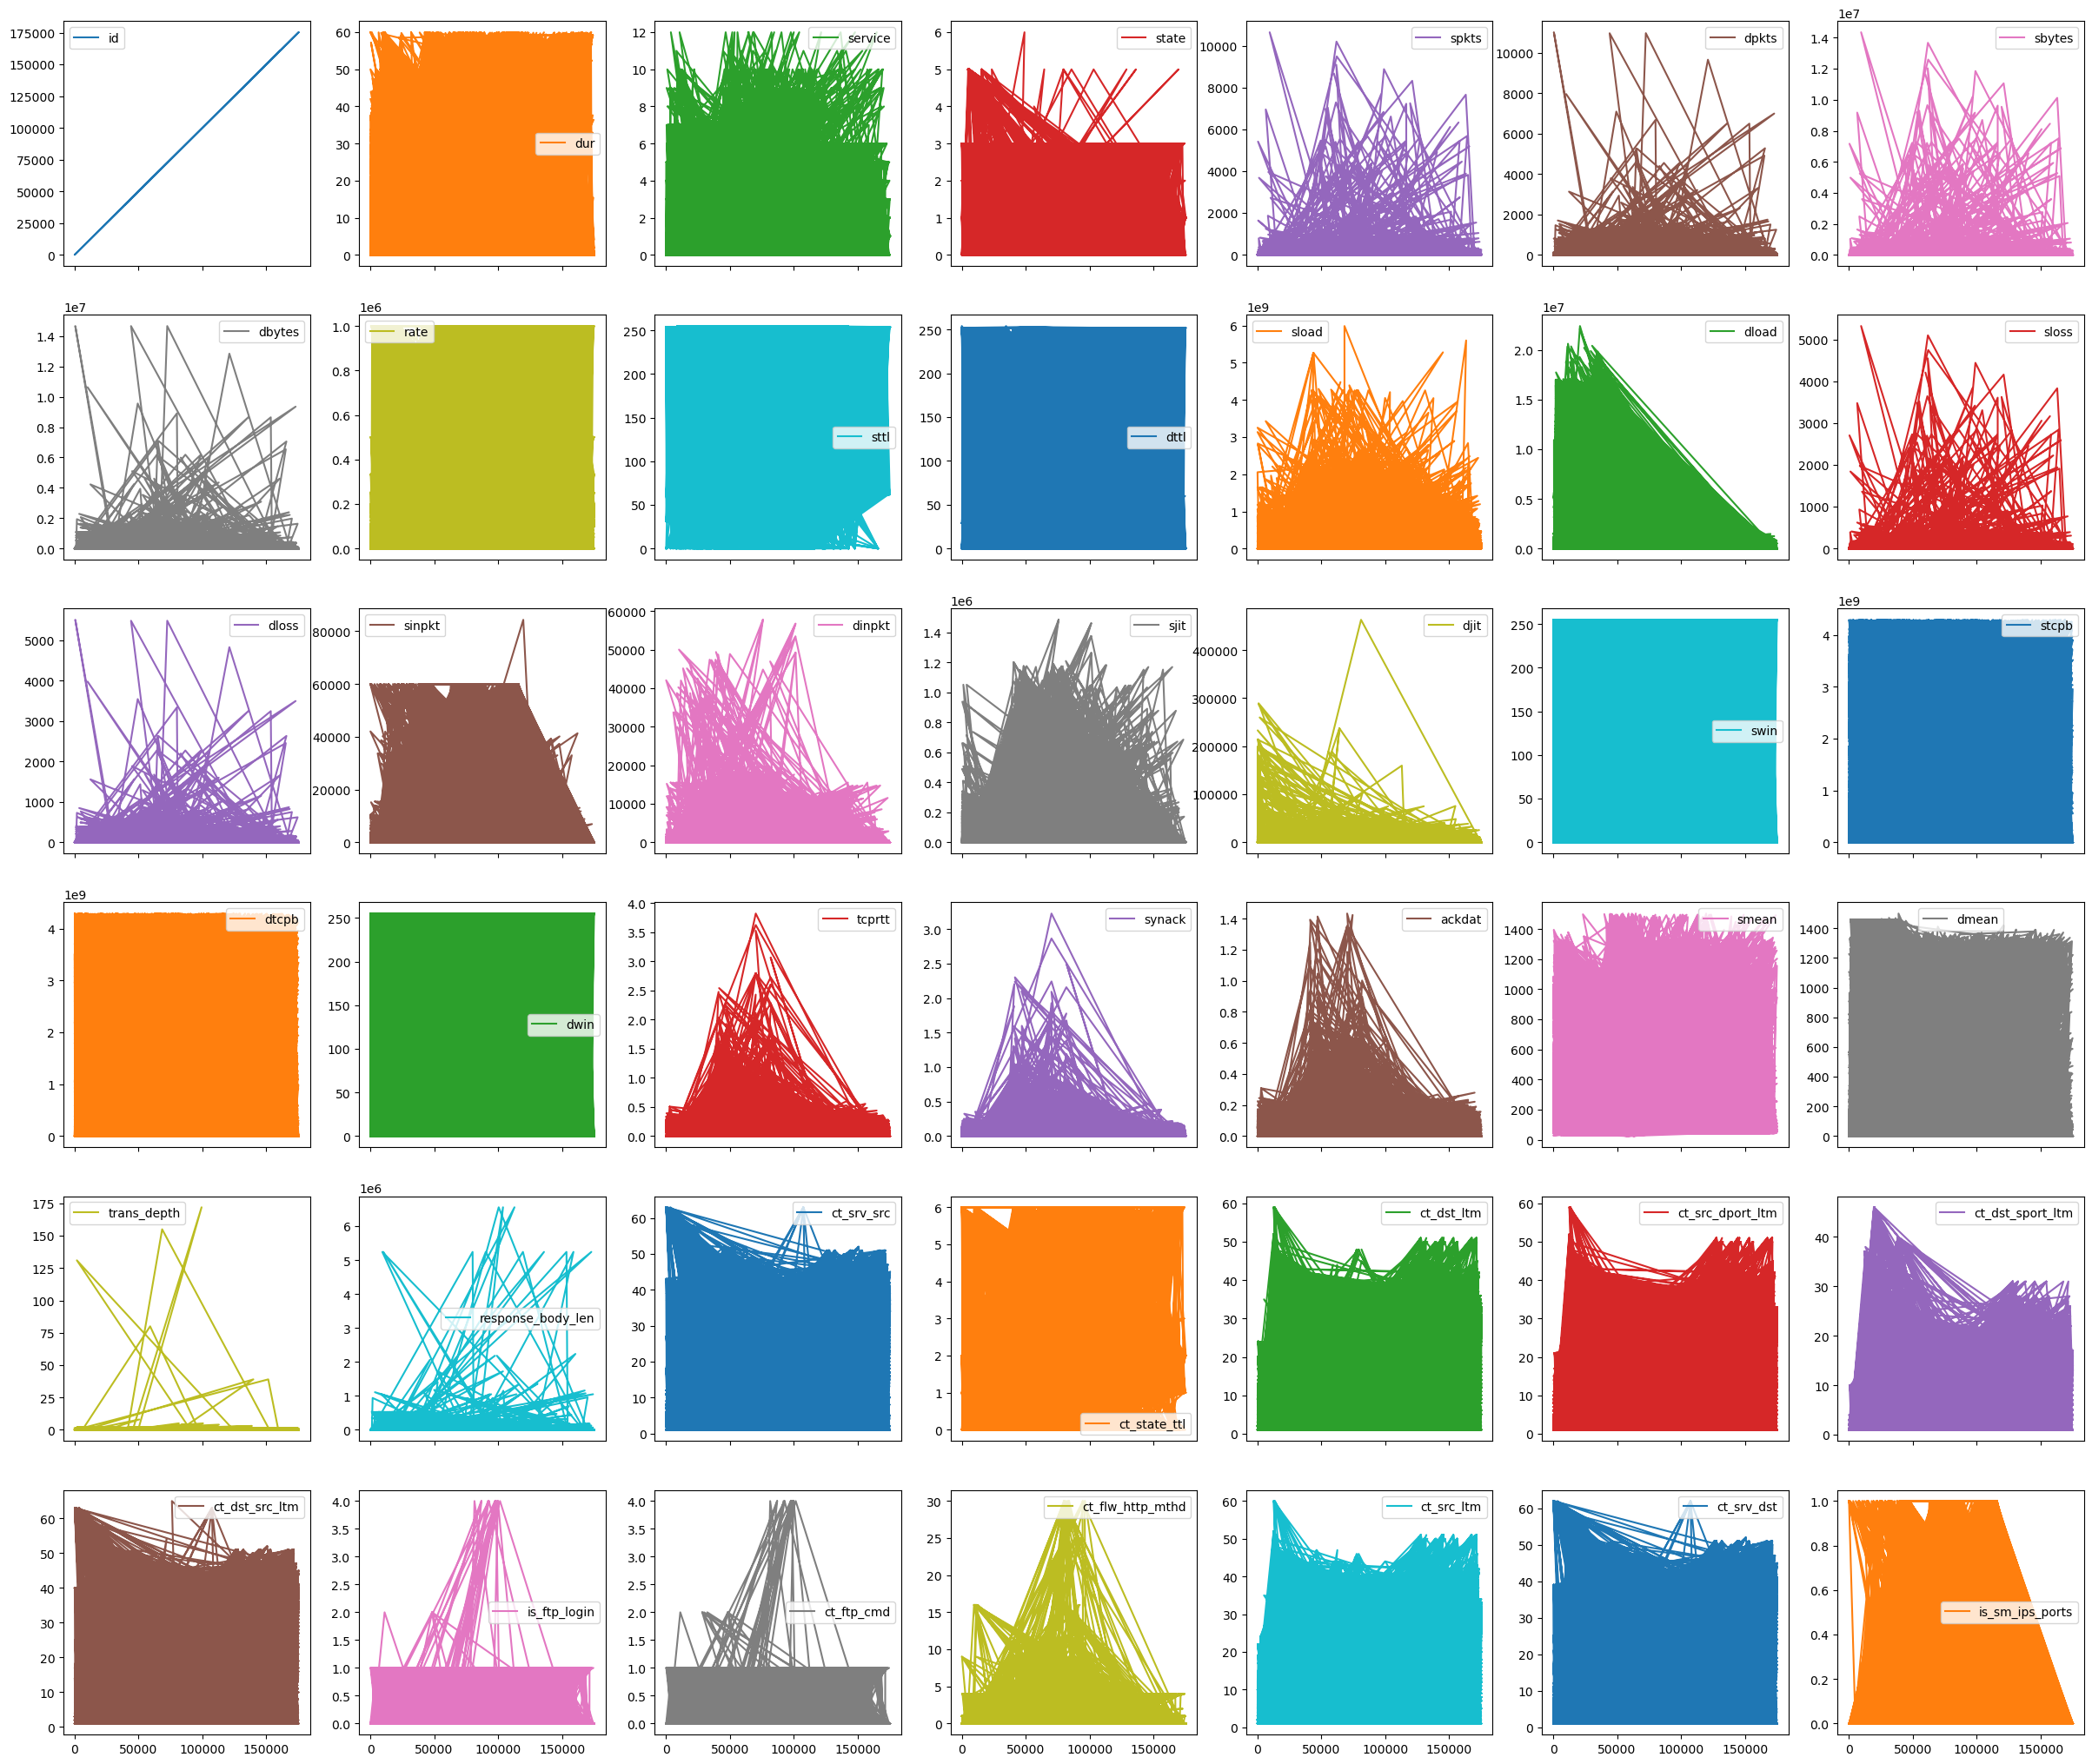

In [18]:
X_train.plot(subplots=True, layout=(7,7), figsize=(30, 30))

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)

array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

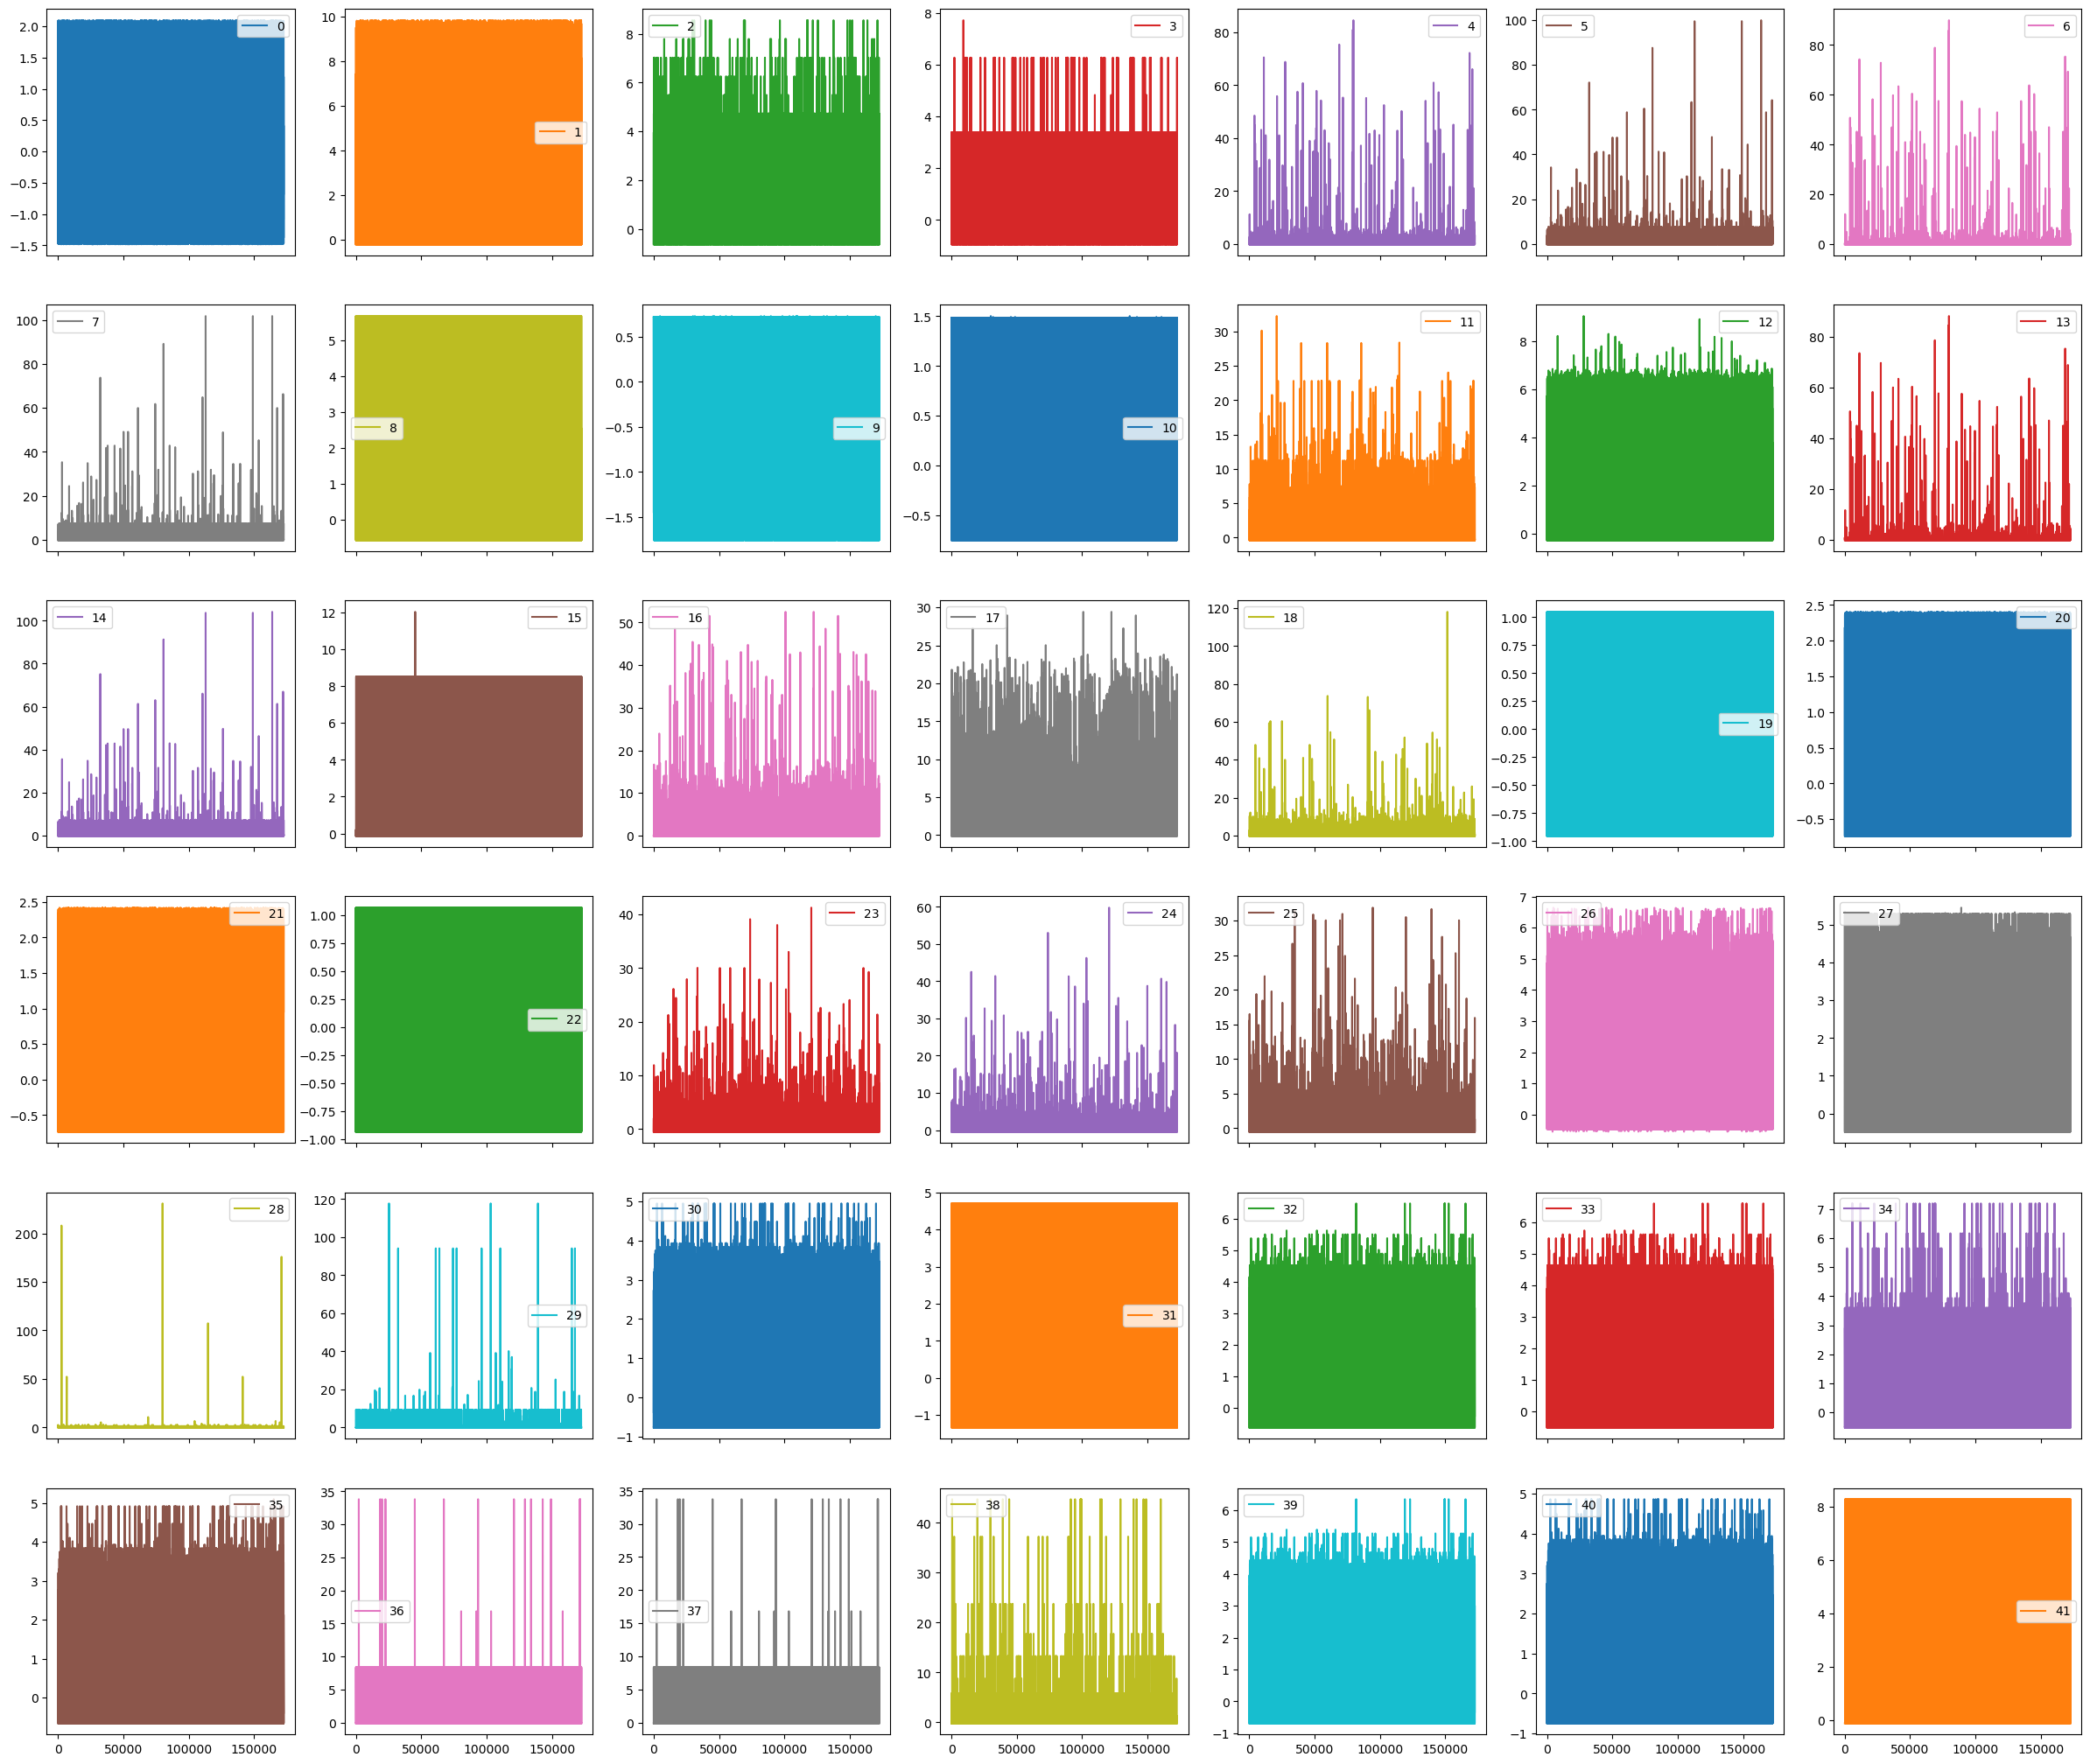

In [20]:
X_train = pd.DataFrame(X_train)
X_train.plot(subplots=True, layout=(7,7), figsize=(30, 30))